In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# insample = pd.read_csv(
#     os.path.join(
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE',
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE insample_results.csv'
#     )
# )

# outofsample_results = pd.read_csv(
#     os.path.join(
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE',
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE outofsample_results.csv'
#     )
# )


##################
# training start #
##################

Tue Oct  8 00:29:10 2024


pricing settings:
Actual/365 (Fixed) day counter
New York stock exchange calendar
compounding: continuous
frequency: annual


importing dataset(s)...



loading: 100%|███████████████████████████████████████████████████████████████████████| 656/656 [00:13<00:00, 50.15it/s]



preparing data...


         spot_price  strike_price       barrier  days_to_maturity  \
count  3.145936e+06  3.145936e+06  3.145936e+06      3.145936e+06   
mean   1.451737e+03  1.450591e+03  1.451173e+03      3.310135e+02   
min    1.274240e+03  1.146816e+03  6.371200e+02      6.000000e+01   
25%    1.388040e+03  1.371960e+03  1.094435e+03      9.000000e+01   
50%    1.471490e+03  1.448057e+03  1.467645e+03      3.600000e+02   
75%    1.512520e+03  1.535186e+03  1.831271e+03      5.400000e+02   
max    1.565180e+03  1.721698e+03  2.347770e+03      7.200000e+02   
std    7.335132e+01  1.122290e+02  4.547500e+02      2.416825e+02   

       barrier_price     rebate  dividend_rate  risk_free_rate         theta  \
count   3.145936e+06  3145936.0   3.145936e+06    3.145936e+06  3.145936e+06   
mean    5.390951e+01        0.0   1.961395e-02    4.000000e-02  4.643268e-02   
min     2.593117e-08        0.0   1.779800e-02    4.000000e-02  1.992058e-02   
25%     2.079217e+00        0.0   1.8

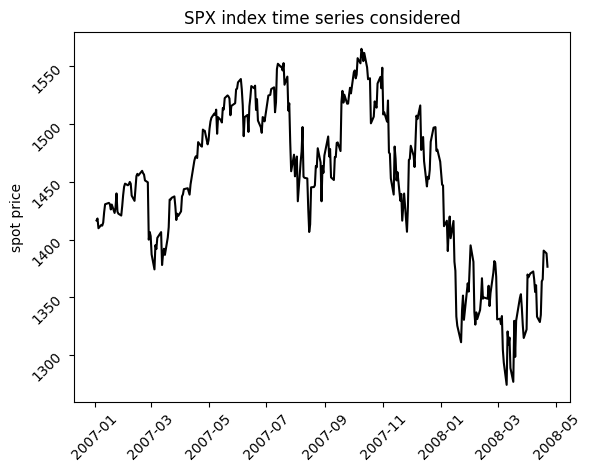

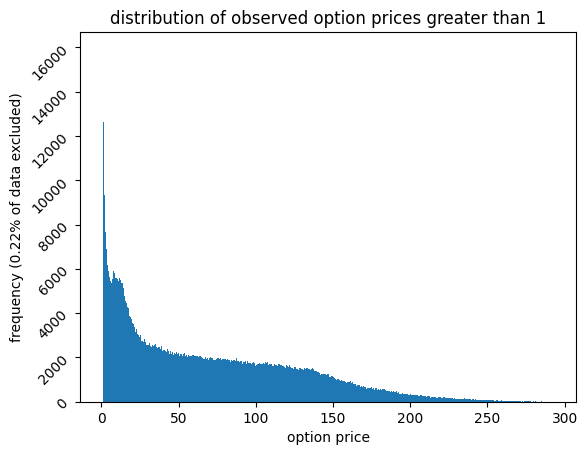

test size: 1.0%
random state: None
maximum iterations: 1000

target: 
observed_price

features: 
['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier', 'barrier_type_name', 'w']

feature transformer(s):
('StandardScaler', StandardScaler(), ['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier'])

('OneHotEncoder', OneHotEncoder(sparse_output=False), ['barrier_type_name', 'w'])

target transformer(s):
StandardScaler()

#################
# training data #
#################
         spot_price  strike_price       barrier  days_to_maturity  \
count  2.776119e+06  2.776119e+06  2.776119e+06      2.776119e+06   
mean   1.466755e+03  1.465568e+03  1.466018e+03      3.313401e+02   
min    1.304460e+03  1.174014e+03  6.522300e+02      6.000000e+01   
25%    1.433650e+03  1.388896e+03  1.100127e+03      9.000000e+01   
50%    1.478450e+03 

<Figure size 640x480 with 0 Axes>

In [3]:
from train_main import model_fit, outofsample_results, insample_results

In [4]:
maturities = outofsample_results['days_to_maturity'].unique().tolist()
barrier_type_names = outofsample_results['barrier_type_name'].unique().tolist()
oos_byt = outofsample_results.groupby(by='days_to_maturity')

RMSE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    subset = oos_byt.get_group(t)
    for i in barrier_type_names:
        RMSE.loc[t,i] = np.sqrt(np.average(subset['outofsample_error'][subset['barrier_type_name']==i]**2))
print(f"\nRMSE:\n{RMSE}\n")

MAE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    subset = oos_byt.get_group(t)
    for i in barrier_type_names:
        MAE.loc[t,i] = np.average(np.abs(subset['outofsample_error'][subset['barrier_type_name']==i]))
print(f"\nMAE:\n{MAE}\n")


RMSE:
      DownOut    DownIn     UpOut      UpIn
60   3.009732  2.958280  3.219771  2.571735
90   2.236960  1.831658  2.339878  2.462689
180  3.022935  2.641169  2.757261  2.693133
360  3.225634  3.643823  2.856289  4.263496
540  3.443311  2.601835  3.299393  3.867941
720  3.227683  3.034525  3.765197  3.974216


MAE:
      DownOut    DownIn     UpOut      UpIn
60   2.300182  1.813375  2.482412  1.520970
90   1.745657  1.212731  1.823702  1.612488
180  2.264192  1.732217  2.202379  1.762350
360  2.464007  2.514801  2.181382  2.941569
540  2.560294  1.950244  2.413064  2.739827
720  2.389166  2.323249  2.543601  2.843640



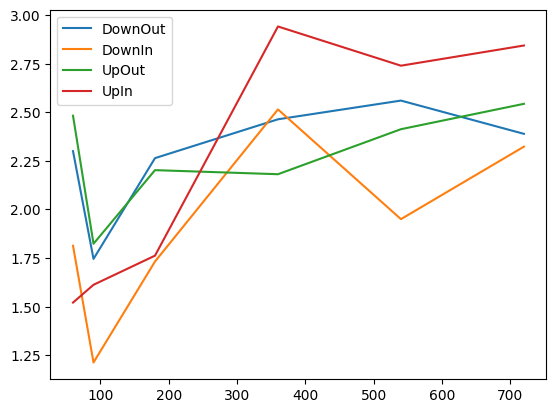

In [5]:
plt.figure()
plt.plot(MAE.loc[:, 'DownOut'], label='DownOut')
plt.plot(MAE.loc[:, 'DownIn'], label='DownIn')
plt.plot(MAE.loc[:, 'UpOut'], label='UpOut')
plt.plot(MAE.loc[:, 'UpIn'], label='UpIn')
plt.legend()
plt.show()
plt.close()